### LOGISTIC REGRESSION FOR BREAST CANCER

##### CLASSIFICATION IN SUPERVISED LEARNING

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [136]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [138]:
df['Target'].value_counts()

Target
1    357
0    212
Name: count, dtype: int64

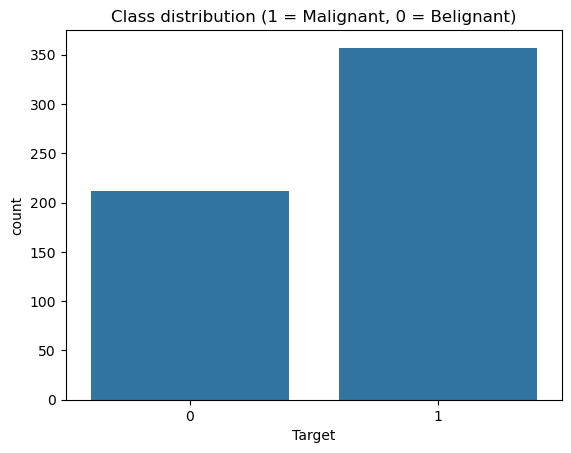

In [140]:
sns.countplot(x = 'Target', data = df)
plt.title('Class distribution (1 = Malignant, 0 = Belignant)')
plt.show()

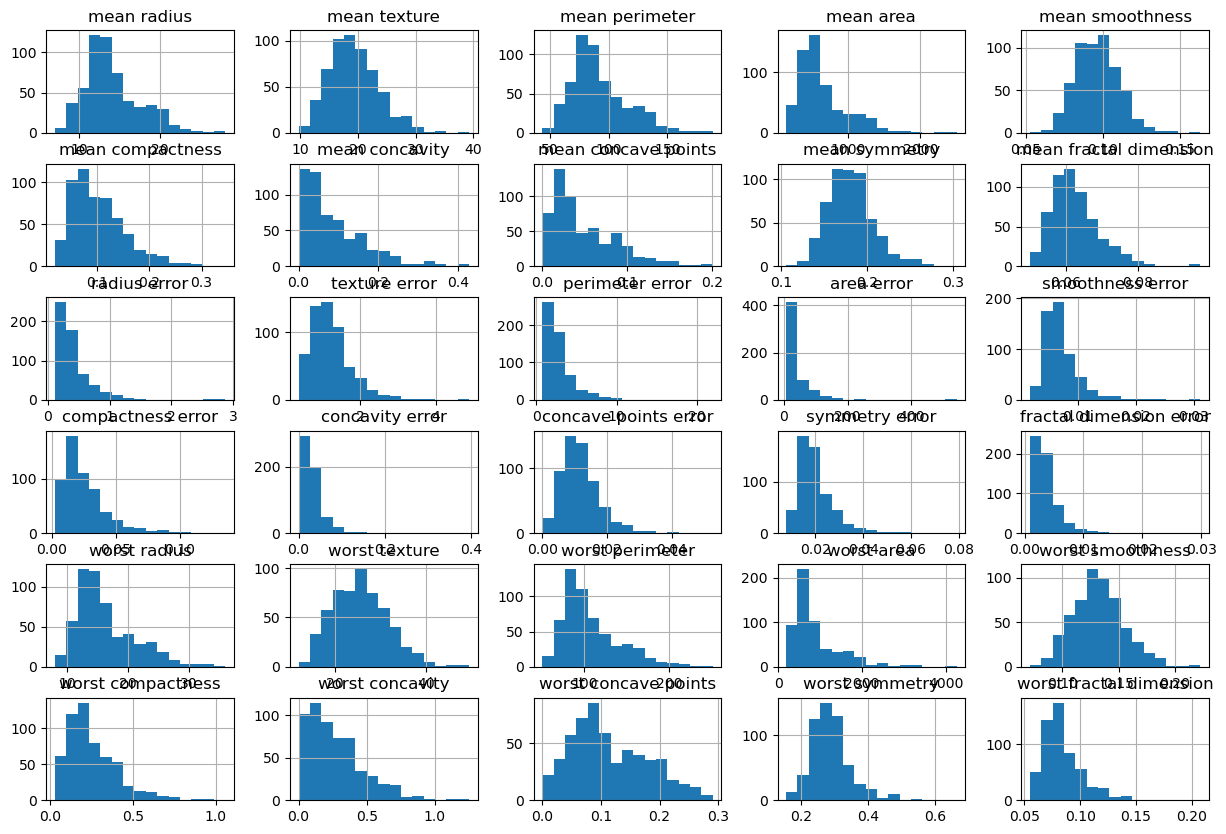

In [142]:
df[data.feature_names].hist(bins = 15, figsize = (15, 10))
plt.show()

In [143]:
X = df[data.feature_names]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [144]:
y = df['Target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [222]:
y_pred = model.predict(X_test)

In [223]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.956140350877193

In [227]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## PARAMETER FINE TUNNING USING GRID SEARCH LOGISTIC REGRESSION

In [230]:
log_reg = model

In [232]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] # Regularization strength
             , 'penalty': ['l2'], # L 2 regularization
             'solver' : ['lbfgs'],
             'class_weight': [None, 'balanced']} # handle imbalance
# Regularization strength

In [234]:
grid_search = GridSearchCV(estimator = log_reg,
                          param_grid = param_grid,
                          cv = 5,
                          scoring = 'recall')

In [236]:
grid_search.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='recall')

In [237]:
best_model = grid_search.best_estimator_

In [238]:
print("Best hyperparameters:" , grid_search.best_params_)

Best hyperparameters: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}


In [239]:
y_probs = best_model.predict_proba(X_test)[:, 1]
y_probs

array([8.61098680e-01, 4.58073100e-09, 2.00990997e-04, 9.99910582e-01,
       9.99994396e-01, 2.48256389e-12, 2.93717416e-13, 6.17173680e-03,
       9.59906974e-01, 9.99386750e-01, 9.58270970e-01, 3.30124872e-04,
       9.97497089e-01, 3.99492045e-02, 9.99536355e-01, 4.54365958e-04,
       9.99677541e-01, 9.99999742e-01, 9.99999808e-01, 2.68371600e-09,
       9.53249593e-01, 9.98736216e-01, 5.43091134e-12, 9.99938410e-01,
       9.99396974e-01, 9.99918588e-01, 9.99800430e-01, 9.99747633e-01,
       9.98752200e-01, 1.18826826e-09, 9.99358057e-01, 9.99952857e-01,
       9.98988916e-01, 9.96377360e-01, 9.99963545e-01, 9.99114022e-01,
       2.06197950e-03, 9.99283698e-01, 1.67939584e-06, 8.28776503e-01,
       9.99968031e-01, 7.93882206e-05, 9.99546568e-01, 9.98872395e-01,
       9.99934561e-01, 9.68736587e-01, 9.99963755e-01, 9.99956097e-01,
       9.56523609e-01, 9.99834344e-01, 6.66521233e-06, 6.47359127e-11,
       8.78995726e-01, 9.99976292e-01, 9.99818472e-01, 9.94106067e-01,
      

In [240]:
import numpy as np

In [241]:
for t in np.arange(0.5, 0.8, 0.05):
    y_pred_custom = (y_probs >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred_custom)
    false_positive = cm[0][1]
    false_negative = cm[1][0]
    print(f"\nThreshold: {t:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("Type I Errors (False Positives):", false_positive)
    print("Type II Errors (False Negatives):", false_negative)
    if false_positive == 0:
        print("Found threshold with 0 Type I errors!")
        break


Threshold: 0.50
Confusion Matrix:
[[39  4]
 [ 1 70]]
Type I Errors (False Positives): 4
Type II Errors (False Negatives): 1

Threshold: 0.55
Confusion Matrix:
[[40  3]
 [ 1 70]]
Type I Errors (False Positives): 3
Type II Errors (False Negatives): 1

Threshold: 0.60
Confusion Matrix:
[[41  2]
 [ 1 70]]
Type I Errors (False Positives): 2
Type II Errors (False Negatives): 1

Threshold: 0.65
Confusion Matrix:
[[41  2]
 [ 1 70]]
Type I Errors (False Positives): 2
Type II Errors (False Negatives): 1

Threshold: 0.70
Confusion Matrix:
[[41  2]
 [ 1 70]]
Type I Errors (False Positives): 2
Type II Errors (False Negatives): 1

Threshold: 0.75
Confusion Matrix:
[[42  1]
 [ 1 70]]
Type I Errors (False Positives): 1
Type II Errors (False Negatives): 1

Threshold: 0.80
Confusion Matrix:
[[42  1]
 [ 1 70]]
Type I Errors (False Positives): 1
Type II Errors (False Negatives): 1
